In [ ]:
import pandas as pd
from prophet import Prophet

Install necessary packages, namely pandas and prophet if you do not have already

In [ ]:
df = pd.read_csv('GNPDataset.csv', on_bad_lines='skip')

Data is good, but need to drop last two columns and then reformat csv with date in one column and the visitor number in the second column to feed prophet properly

In [ ]:
#taken and modified from https://github.com/fred-lindsey/projects/blob/main/TSA_NPS_visitor_prediction/wrangle.py

# set 'Year' as the index, so that I can stack the dataframe, ie reduce the dimensions so that I can merge the dataframes
df = df.set_index('Year')
# drop 'Textbox4' and 'AnnualTotal' column. This is a yearly % change and yearly total column for the dataset
df = df.drop(columns=['Textbox4','AnnualTotal'])
# now I'm going to stack, meaning move the columns headers under the index, to reduce the dimensionality of the dataframe
df = df.stack(level=0)
# stacking produces a series when I'm done, and it will need to be converted back into a DF
df = df.to_frame()
# now add a title to the DF's only column
df.columns = ['glacier_national_park_visits']
# reset the index to seperate the current multi-index into distinct year and month columns
df = df.reset_index(drop=False)
# create a composite date column
df['date'] = df.Year.astype(str) + "-" + df.level_1
# convert the date column to datetime object
df.date = pd.to_datetime(df.date)
# set the date as the index and sort index
df = df.set_index('date').sort_index()
# drop Year and level_1 columns that are no longer needed
df = df.drop(columns=['Year', 'level_1'])
display(df)

In [ ]:
df.to_csv(r'C:\Users\divergence\OneDrive - DIVERGENCE ONE\Documents\GitHub\2022-07-DSI-WDX\douglas481\ML and Python Capstone\IndexedData.csv', index=True)

In [146]:
df = pd.read_csv('IndexedData.csv')

In [147]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].str.replace(r',', '')
df['y'] = pd.to_numeric(df['y'])
display(df)

,ds,y
0,1979-01-01,6357
1,1979-02-01,3480
2,1979-03-01,11790
3,1979-04-01,15000
4,1979-05-01,65923
...,...,...
511,2021-08-01,670628
512,2021-09-01,533388
513,2021-10-01,149564
514,2021-11-01,26300


Data has been cleaned and formatted to be fed to Prophet, so next we have to train the model, for this one I will build a forecast with uncertainty built into it

In [161]:
m = Prophet(mcmc_samples=300)
model = m.fit(df, show_progress=False)
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)

12:08:01 - cmdstanpy - INFO - CmdStan installation c:\ProgramData\Anaconda3\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
12:08:01 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
12:08:01 - cmdstanpy - INFO - CmdStan start processing
12:08:01 - cmdstanpy - INFO - Chain [1] start processing
12:08:01 - cmdstanpy - INFO - Chain [2] start processing
12:08:01 - cmdstanpy - INFO - Chain [3] start processing
12:08:01 - cmdstanpy - INFO - Chain [4] start processing
12:08:08 - cmdstanpy - INFO - Chain [3] done processing
12:08:08 - cmdstanpy - INFO - Chain [1] done processing
12:08:08 - cmdstanpy - INFO - Chain [2] done processing
12:08:09 - cmdstanpy - INFO - Chain [4] done processing
12:08:09 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Excepti

In [154]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,-2.129623e+06,-139557.482129,81571.303135,-1.316946e+07,5.075827e+06,2.099663e+06,-5.101105e+06,1.314727e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-159598.509640,-178762.114403,-139610.469575,0.0,0.0,0.0,-29959.535967
1,1979-02-01,-2.129264e+06,-139652.101652,83260.060803,-1.316902e+07,5.076288e+06,2.100698e+06,-5.110015e+06,1.313099e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-158564.042546,-175942.505159,-141650.822563,0.0,0.0,0.0,-28566.401499
2,1979-03-01,-2.128940e+06,-133754.914452,94160.302041,-1.316863e+07,5.076705e+06,2.105373e+06,-5.091937e+06,1.311969e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-153888.199936,-180321.466179,-122919.408328,0.0,0.0,0.0,-23566.601255
3,1979-04-01,-2.128581e+06,-133892.100410,105460.484004,-1.316819e+07,5.077166e+06,2.109566e+06,-5.096995e+06,1.315851e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-149695.680682,-175495.647402,-122323.423006,0.0,0.0,0.0,-19015.414589
4,1979-05-01,-2.128234e+06,-56907.266989,178782.657285,-1.316777e+07,5.077613e+06,2.193965e+06,-5.011982e+06,1.322179e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-65296.464881,-90815.518578,-41733.330109,0.0,0.0,0.0,65730.898670


In [155]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
876,2022-11-27,-2.007242e+06,-116645.453958,326579.912196,-1.303979e+07,5.197736e+06,2.120246e+06,-5.021363e+06,1.304187e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-139015.837127,-345197.157642,41051.147524,0.0,0.0,0.0,113003.231174
877,2022-11-28,-2.007226e+06,-73413.971020,296879.965870,-1.303977e+07,5.197755e+06,2.115733e+06,-5.025517e+06,1.308928e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-143528.125345,-304495.298103,-5776.383128,0.0,0.0,0.0,108507.680635
878,2022-11-29,-2.007209e+06,-52163.333500,249905.601673,-1.303975e+07,5.197774e+06,2.110455e+06,-5.027398e+06,1.313959e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-148806.879905,-262520.265424,-51818.819917,0.0,0.0,0.0,103245.663661
879,2022-11-30,-2.007192e+06,-35402.640806,221732.874792,-1.303973e+07,5.197794e+06,2.104553e+06,-5.061830e+06,1.317865e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-154708.477474,-217449.179299,-99501.472412,0.0,0.0,0.0,97360.803922
880,2022-12-01,-2.007176e+06,-31403.934332,201244.776041,-1.303971e+07,5.197813e+06,2.098192e+06,-5.108459e+06,1.314310e+07,2.259262e+06,-4.957919e+06,1.329447e+07,-161069.705352,-182838.339787,-140729.295124,0.0,0.0,0.0,91016.313630


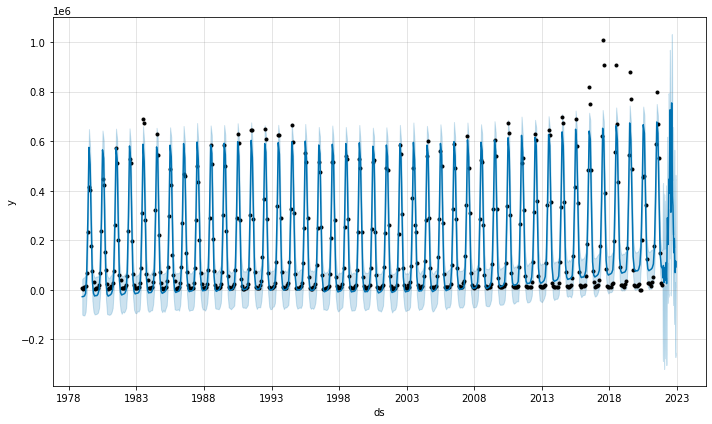

In [162]:
plot1 = m.plot(forecast)

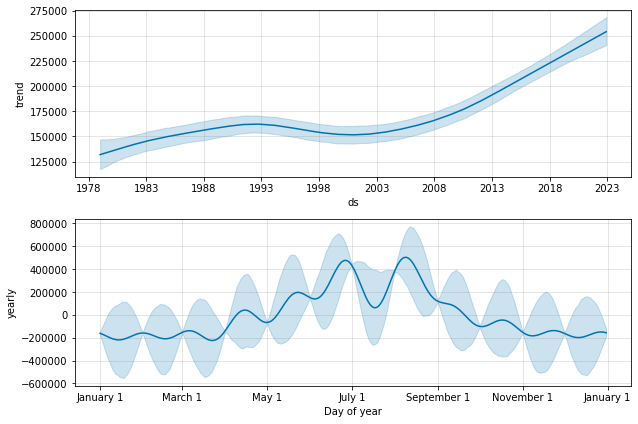

In [163]:
plt2 = m.plot_components(forecast)

Now we will build some seasonal models to compare to the models with the built in uncertainty

In [167]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)
future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.head()

12:30:57 - cmdstanpy - INFO - Chain [1] start processing
12:30:57 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,33251.600344,-132276.900478,92273.930821,33251.600344,33251.600344,-52168.526563,-52168.526563,-52168.526563,107638.770186,107638.770186,107638.770186,-159807.296749,-159807.296749,-159807.296749,0.0,0.0,0.0,-18916.926218
1,1979-02-01,33359.146820,-126715.135712,84760.239122,33359.146820,33359.146820,-51789.486889,-51789.486889,-51789.486889,107638.770186,107638.770186,107638.770186,-159428.257075,-159428.257075,-159428.257075,0.0,0.0,0.0,-18430.340069
2,1979-03-01,33456.285572,-129632.984175,87747.433500,33456.285572,33456.285572,-49659.686794,-49659.686794,-49659.686794,107638.770186,107638.770186,107638.770186,-157298.456980,-157298.456980,-157298.456980,0.0,0.0,0.0,-16203.401222
3,1979-04-01,33563.832048,-109207.784106,98979.562229,33563.832048,33563.832048,-38979.296788,-38979.296788,-38979.296788,107638.770186,107638.770186,107638.770186,-146618.066974,-146618.066974,-146618.066974,0.0,0.0,0.0,-5415.464740
4,1979-05-01,33667.909282,-30017.097890,181912.746494,33667.909282,33667.909282,39795.134799,39795.134799,39795.134799,107638.770186,107638.770186,107638.770186,-67843.635387,-67843.635387,-67843.635387,0.0,0.0,0.0,73463.044081


In [168]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
876,2022-11-27,141133.832214,4106.607461,218850.588869,140758.776621,141463.566467,-29444.092617,-29444.092617,-29444.092617,107638.770186,107638.770186,107638.770186,-137082.862803,-137082.862803,-137082.862803,0.0,0.0,0.0,111689.739597
877,2022-11-28,141149.326624,1748.684556,221030.997773,140771.728499,141481.874819,-34285.747481,-34285.747481,-34285.747481,107638.770186,107638.770186,107638.770186,-141924.517667,-141924.517667,-141924.517667,0.0,0.0,0.0,106863.579143
878,2022-11-29,141164.821035,-10141.525359,199405.412820,140784.680378,141500.183171,-40042.783334,-40042.783334,-40042.783334,107638.770186,107638.770186,107638.770186,-147681.553520,-147681.553520,-147681.553520,0.0,0.0,0.0,101122.037701
879,2022-11-30,141180.315445,-11788.647202,197167.344346,140798.156202,141517.520922,-46557.804051,-46557.804051,-46557.804051,107638.770186,107638.770186,107638.770186,-154196.574237,-154196.574237,-154196.574237,0.0,0.0,0.0,94622.511394
880,2022-12-01,141195.809856,-24594.116694,196771.456249,140812.594282,141534.275674,-53650.158194,-53650.158194,-53650.158194,107638.770186,107638.770186,107638.770186,-161288.928380,-161288.928380,-161288.928380,0.0,0.0,0.0,87545.651662


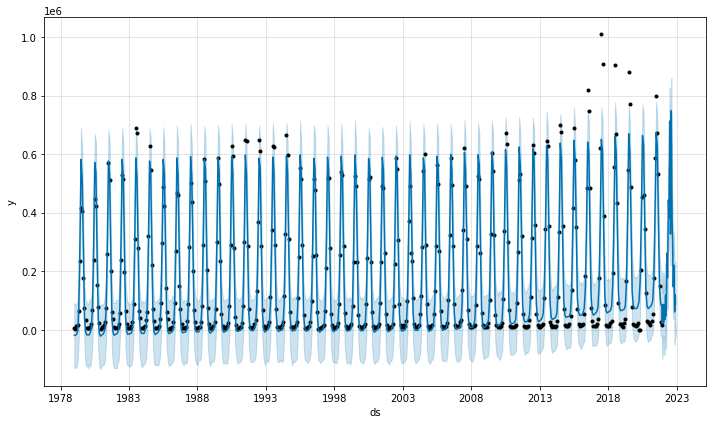

In [169]:
plot1 = m.plot(forecast)

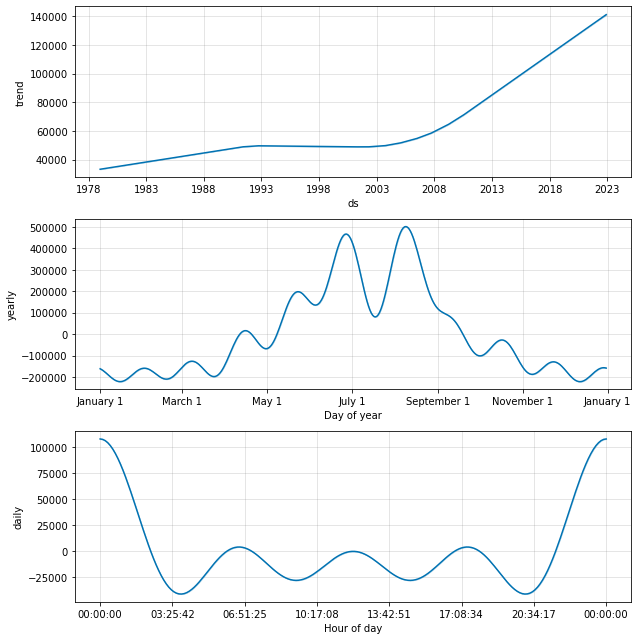

In [170]:
plt2 = m.plot_components(forecast)